<a href="https://colab.research.google.com/github/JulioCastillo1/TP1-Datos/blob/master/Palabras%20clave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

url='https://raw.githubusercontent.com/JulioCastillo1/TP1-Datos/master/train.csv'
tweets = pd.read_csv(url)
tweets.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
tweets['fire'] = tweets['text'].str.contains('fire')
tweets['fire'].sum()

383

In [3]:
tweets['storm'] = tweets['text'].str.contains('storm')
tweets['storm'].sum()

280

In [4]:
tweets['flood'] = tweets['text'].str.contains('flood')
tweets['flood'].sum()

99

In [5]:
tweets['death'] = tweets['text'].str.contains('death')
tweets['death'].sum()

87

In [6]:
tweets['love'] = tweets['text'].str.contains('love')
tweets['love'].sum()

92

In [7]:
tweets = tweets.drop(['id','keyword','location','text'],axis = 1)

tweets_target = tweets.loc[tweets['target'] == 1]
tweets_no_target = tweets.loc[tweets['target'] == 0]

sum_target = tweets_target.drop('target',axis = 1).sum()
sum_target

fire     284
storm    190
flood     74
death     52
love      13
dtype: int64

In [8]:
sum_no_target = tweets_no_target.drop('target',axis = 1).sum()
sum_no_target

fire     99
storm    90
flood    25
death    35
love     79
dtype: int64

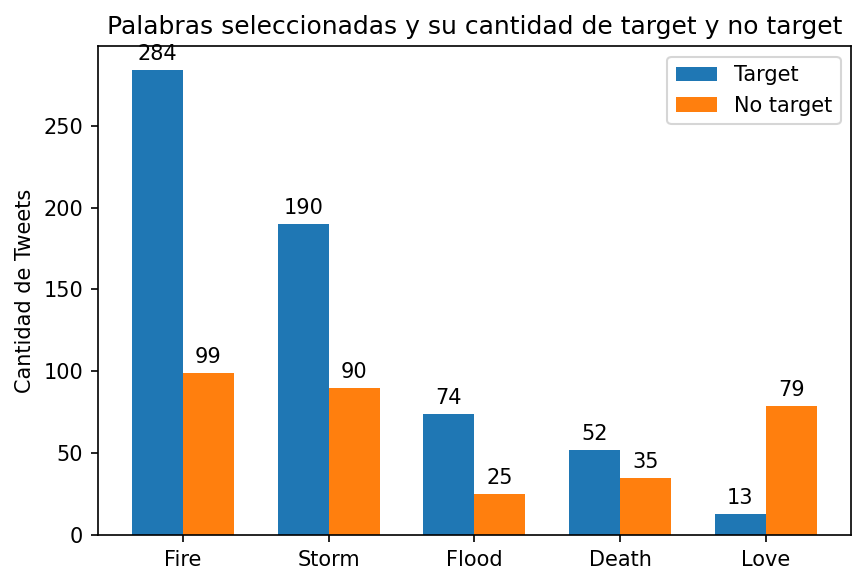

In [9]:
labels = ['Fire','Storm','Flood','Death','Love']
x = np.arange(len(labels))
width = 0.35

plt.rcParams['figure.dpi'] = 150

fig,ax = plt.subplots()
rects_target = ax.bar(x-width/2,sum_target,width,label='Target')
rects_no_target = ax.bar(x+width/2,sum_no_target,width,label='No target')

ax.set_ylabel('Cantidad de Tweets')
ax.set_title('Palabras seleccionadas y su cantidad de target y no target')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects_target)
autolabel(rects_no_target)

fig.tight_layout()

plt.show()